**OUTLINE**
1. Overview
2. Data Pre-Processing
4. Visualization
  - Word cloud
  - Number of Tweets by location
  - Representation of missing values
  - Bar plot of unique values in each column
  - Distribution of words in text column
  - Users with maximum tweets
  - Plot platform with maximum number of tweets
5. Sentiment analysis with Textblob
6. Toppic modelling for "Nutral Opinion" using Gensim LSI & LDA bold text

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 
import nltk
import re
import string

from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md

### 1. OVERVIEW DATA

In [2]:
# Read data
data = pd.read_csv('Macron.csv')

In [3]:
data.shape

(2001, 9)

In [4]:
data.columns

Index(['user', 'date', 'text', 'user_location', 'favorite_count',
       'number_followers', 'is_retweet', 'hashtags', 'source'],
      dtype='object')

In [5]:
data.head()

,user,date,text,user_location,favorite_count,number_followers,is_retweet,hashtags,source
0,DrLoupis,Thu Mar 23 21:36:05 +0000 2023,Over a million French protesters gather in Par...,"København, Danmark",50407,285662,False,[],Twitter for iPhone
1,bennyjohnson,Fri Mar 24 01:13:52 +0000 2023,The sum of all fears for globalist technocrats...,Tampa Florida,27384,1391419,False,[],Twitter for iPhone
2,BernieSpofforth,Thu Mar 23 23:01:30 +0000 2023,FRANCE - The firefighters follow the police an...,"North West, England",24930,196109,False,[],Twitter for iPhone
3,BernieSpofforth,Fri Mar 24 12:19:29 +0000 2023,MACRON - Oops the moment Macron realises he’s ...,"North West, England",12298,196109,False,[],Twitter for iPhone
4,DrLoupis,Fri Mar 24 13:28:18 +0000 2023,Millions of people on the streets in Paris. Th...,"København, Danmark",13340,285662,False,[],Twitter for iPhone


In [6]:
data.tail()

,user,date,text,user_location,favorite_count,number_followers,is_retweet,hashtags,source
1996,bennyjohnson,Fri Mar 24 01:13:52 +0000 2023,The sum of all fears for globalist technocrats...,Tampa Florida,27385,1391421,False,[],Twitter for iPhone
1997,BernieSpofforth,Thu Mar 23 23:01:30 +0000 2023,FRANCE - The firefighters follow the police an...,"North West, England",24932,196110,False,[],Twitter for iPhone
1998,BernieSpofforth,Fri Mar 24 12:19:29 +0000 2023,MACRON - Oops the moment Macron realises he’s ...,"North West, England",12300,196110,False,[],Twitter for iPhone
1999,DrLoupis,Fri Mar 24 13:28:18 +0000 2023,Millions of people on the streets in Paris. Th...,"København, Danmark",13342,285665,False,[],Twitter for iPhone
2000,DrLoupis,Thu Mar 23 21:36:05 +0000 2023,Over a million French protesters gather in Par...,"København, Danmark",50408,285665,False,[],Twitter for iPhone


In [7]:
#Dtypes of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user              2001 non-null   object
 1   date              2001 non-null   object
 2   text              2001 non-null   object
 3   user_location     1868 non-null   object
 4   favorite_count    2001 non-null   int64 
 5   number_followers  2001 non-null   int64 
 6   is_retweet        2001 non-null   bool  
 7   hashtags          2001 non-null   object
 8   source            2001 non-null   object
dtypes: bool(1), int64(2), object(6)
memory usage: 127.1+ KB


In [8]:
#Description of the dataset
data.describe()

,favorite_count,number_followers
count,2001.000000,2.001000e+03
mean,13983.808096,6.062937e+05
std,12936.396060,5.791062e+05
min,1341.000000,8.064500e+04
25%,3285.000000,1.961100e+05
50%,11484.000000,2.856620e+05
75%,23615.000000,1.341096e+06
max,50414.000000,2.004534e+06


### 2. DATA PRE-PROCESSING

In [9]:

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
punc=string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers.

def clean_text(text):
    
    #lower case
    text = text.lower()
    # remove text with square brackets
    text = re.sub('\[.*?\]', '', text)
    # remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # remove HTML tags
    text = re.sub('<.*?>+', '', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # remove newline characters
    text = re.sub('\n', '', text)
    # remove numeric sequences
    text = re.sub('\w*\d\w*', '', text)
    #Removing stopwords
    text=" ".join([word for word in str(text).split() if word not in stop_words])  
    #Stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])
    #Lemmatization
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

data['text'] = data['text'].apply(lambda x: clean_text(x))

In [12]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

data['text']=data['text'].apply(lambda x: remove_emoji(x))

In [13]:
data.head()

,user,date,text,user_location,favorite_count,number_followers,is_retweet,hashtags,source
0,DrLoupis,Thu Mar 23 21:36:05 +0000 2023,million french protest gather pari call remov ...,"København, Danmark",50407,285662,False,[],Twitter for iPhone
1,bennyjohnson,Fri Mar 24 01:13:52 +0000 2023,sum fear globalist technocrat happen right fra...,Tampa Florida,27384,1391419,False,[],Twitter for iPhone
2,BernieSpofforth,Thu Mar 23 23:01:30 +0000 2023,franc firefight follow polic begin stand choos...,"North West, England",24930,196109,False,[],Twitter for iPhone
3,BernieSpofforth,Fri Mar 24 12:19:29 +0000 2023,macron oop moment macron realis he’ wear expen...,"North West, England",12298,196109,False,[],Twitter for iPhone
4,DrLoupis,Fri Mar 24 13:28:18 +0000 2023,million peopl street pari want dictat emmanuel...,"København, Danmark",13340,285662,False,[],Twitter for iPhone


### 3. VISUALIZATION

**3.1. Word cloud**

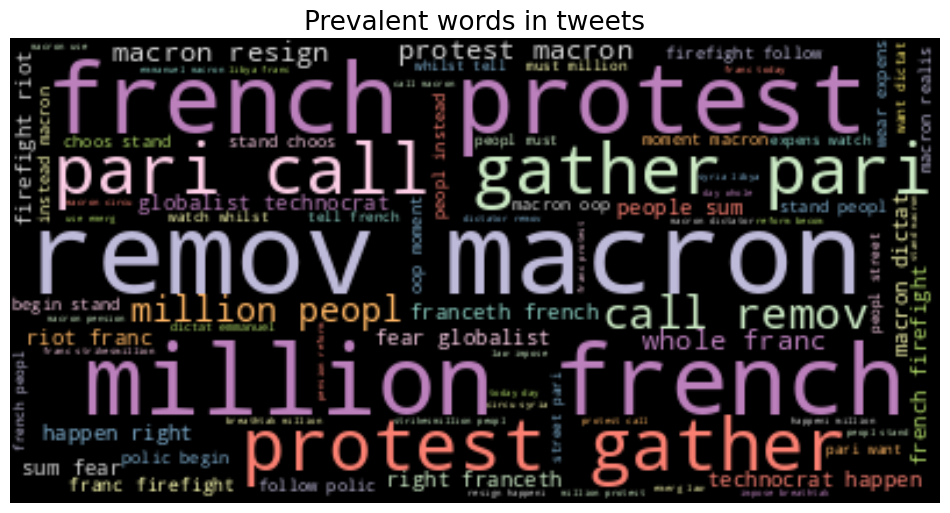

In [14]:
text = ",".join(review for review in data.text)
wordcloud = WordCloud(max_words=200, colormap='Set3',background_color="black").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(10, 10))
plt.title('Prevalent words in tweets',fontsize=19)
plt.show()

**3.2. Number of Tweets by location**

In [15]:
data['user_location'].value_counts()

København, Danmark           402
North West, England          401
Contact: twitter@kim.com     266
Tampa Florida                134
Calgary, Alberta             133
Uppsala, Sweden              133
Paris, France                133
YouTube                      133
GlennGreenwald@gmail.com     133
Name: user_location, dtype: int64

In [16]:
# Replace 'Contact: twitter@kim.com', 'YouTube', 'GlennGreenwald@gmail.com' to empty
mask = data['user_location'].fillna('').str.contains('Contact: twitter@kim.com')
data.loc[mask, 'user_location'] = np.nan
data['user_location'].replace('YouTube',np.nan,inplace=True)
data['user_location'].replace('GlennGreenwald@gmail.com',np.nan,inplace=True)


In [17]:
data['user_location'].value_counts()

København, Danmark     402
North West, England    401
Tampa Florida          134
Calgary, Alberta       133
Uppsala, Sweden        133
Paris, France          133
Name: user_location, dtype: int64

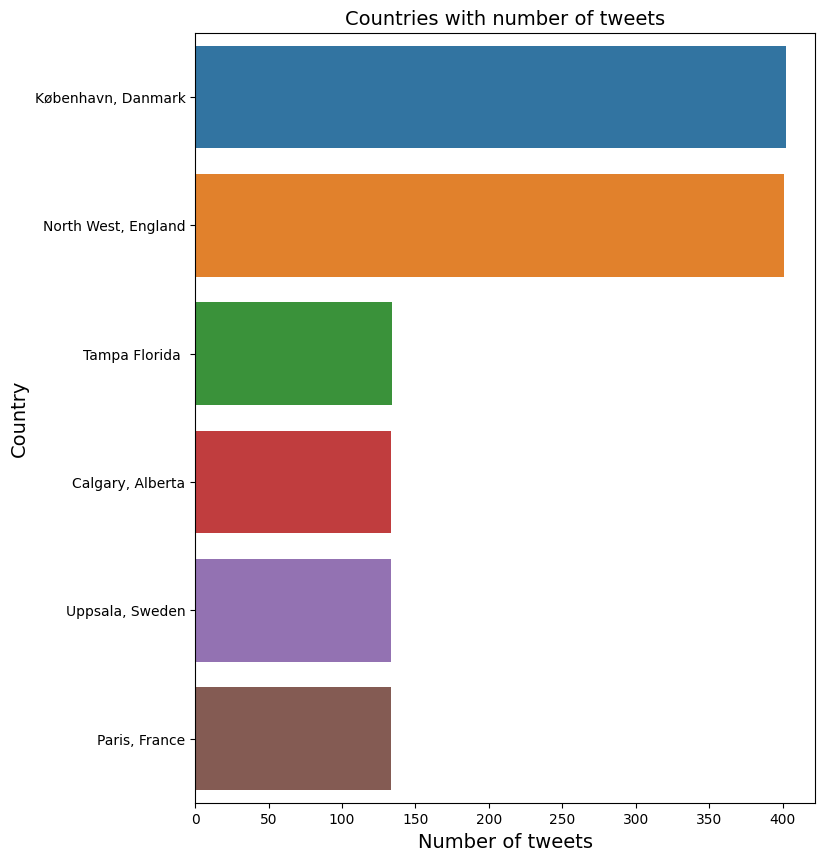

In [18]:
# Bar chart number of Tweets by location
plt.figure(figsize=(8,10))
sns.barplot(x=data["user_location"].value_counts().values[0:10],
            y=data["user_location"].value_counts().index[0:10]);
plt.title("Countries with number of tweets",fontsize=14)
plt.xlabel("Number of tweets",fontsize=14)
plt.ylabel("Country",fontsize=14)
plt.show()

In [19]:
data['user_location'].value_counts()

København, Danmark     402
North West, England    401
Tampa Florida          134
Calgary, Alberta       133
Uppsala, Sweden        133
Paris, France          133
Name: user_location, dtype: int64

In [20]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import folium

# get latitude,longtitude from this web https://www.findlatitudeandlongitude.com/, https://www.latlong.net/

latitude = [55.676097, 52.019029, 27.964157, 51.045325, 60.197663, 48.856614]
longtitude = [12.568337, -0.770427, -82.452606, -114.058101, 17.742031, 2.352222]
labels = ['København, Danmark', 'North West, England', 'Tampa Florida', 'Calgary, Alberta', 'Uppsala, Sweden', 'Paris, France']
numbers = [402, 401, 134, 133, 133, 133]

# Create the base map
m = folium.Map(location=[48, 2], zoom_start=3)

# Add circle markers for each location with the corresponding size and label
for lat, lon, label, num in zip(latitude, longtitude, labels, numbers):
    folium.CircleMarker(location=[lat, lon], radius=num/10, 
                        popup=label, tooltip=f"{num} tweets", 
                        color='blue', fill=True, fill_color='blue').add_to(m)

# Show the map
m

**3.3. Heatmap representation of missing values**

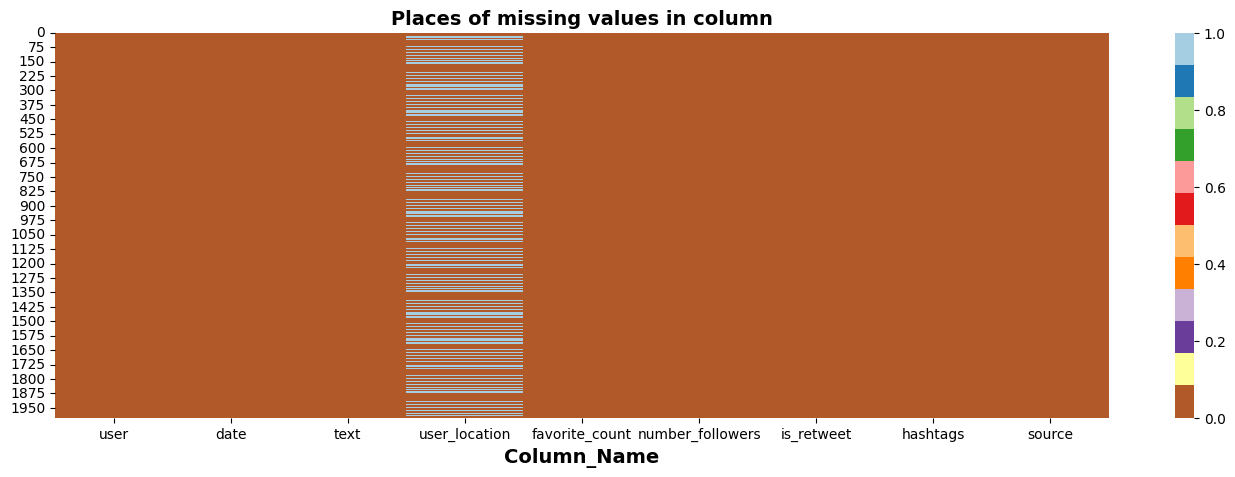

In [22]:
plt.figure(figsize=(17, 5))
sns.heatmap(data.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

**3.4. Bar plot of unique values in each column**

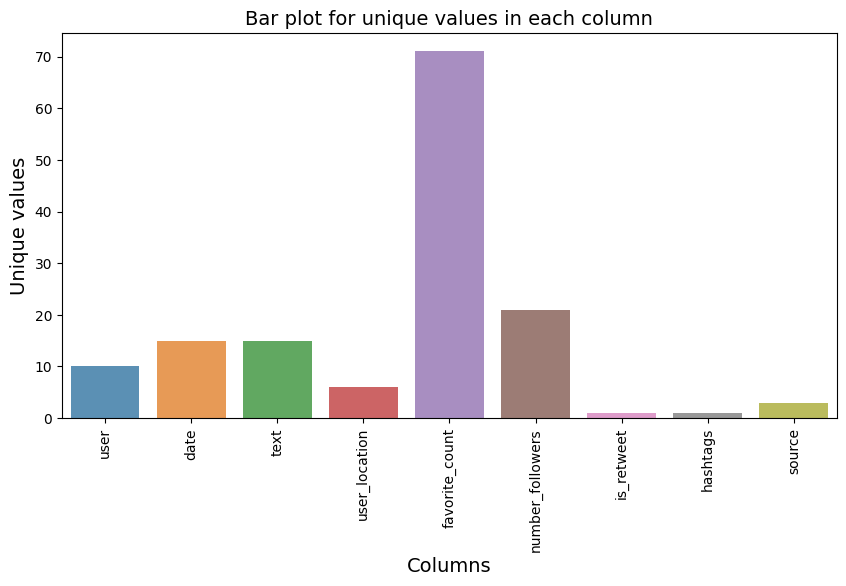

In [23]:
def unique_values_funct(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

udf = unique_values_funct(data)

f, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x=udf['Features'], y=udf['Uniques'], alpha=0.8)
plt.title('Bar plot for unique values in each column', fontsize=14)
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Columns', fontsize=14)
plt.xticks(rotation=90)
plt.show()

**3.5. Distribution of words in text column**

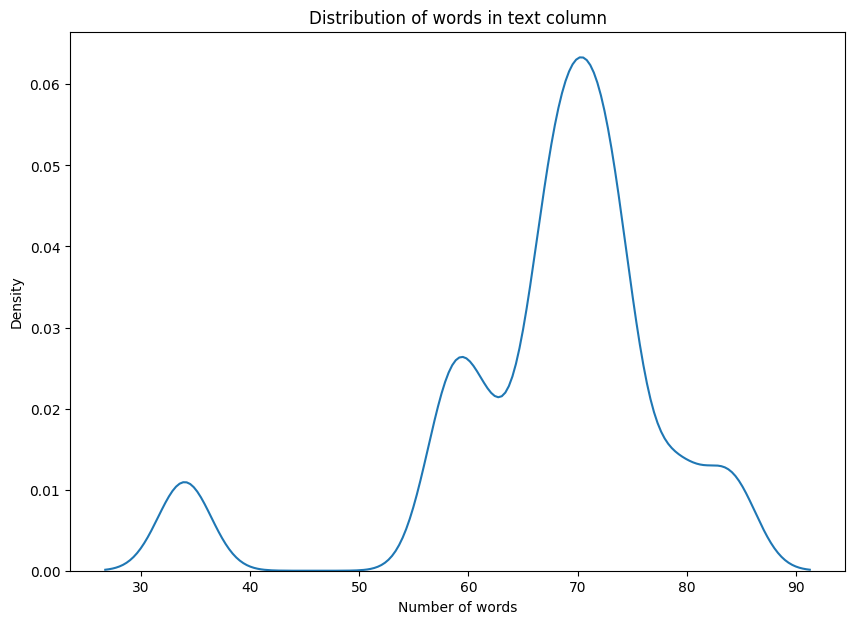

In [24]:
data["num of words in text"] = data["text"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(data["num of words in text"])
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

**3.6. Users with maximum tweets**

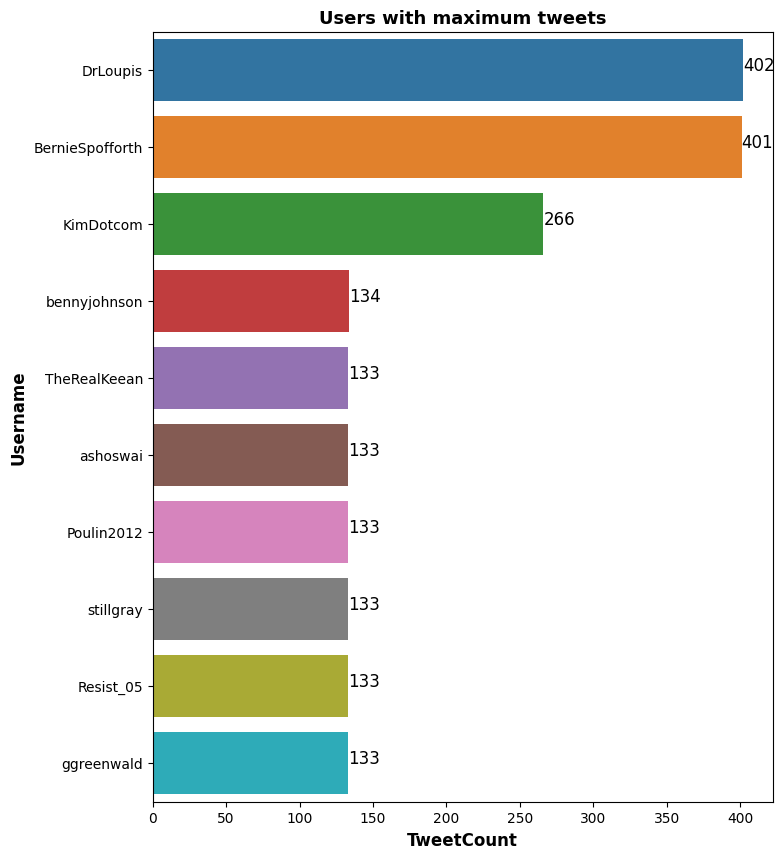

In [25]:
username_count = data['user'].value_counts().reset_index().rename(columns={
    'user':'tweet_count','index':'user_name'})

plt.figure(figsize=(8, 10))
sns.barplot(y='user_name',x='tweet_count',data=username_count.head(20))
y=username_count['tweet_count'].head(20)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Users with maximum tweets',weight='bold', size=13)
plt.ylabel('Username', size=12, weight='bold')
plt.xlabel('TweetCount', size=12, weight='bold')
plt.show()

**3.7. Plot platform with maximum number of tweets**

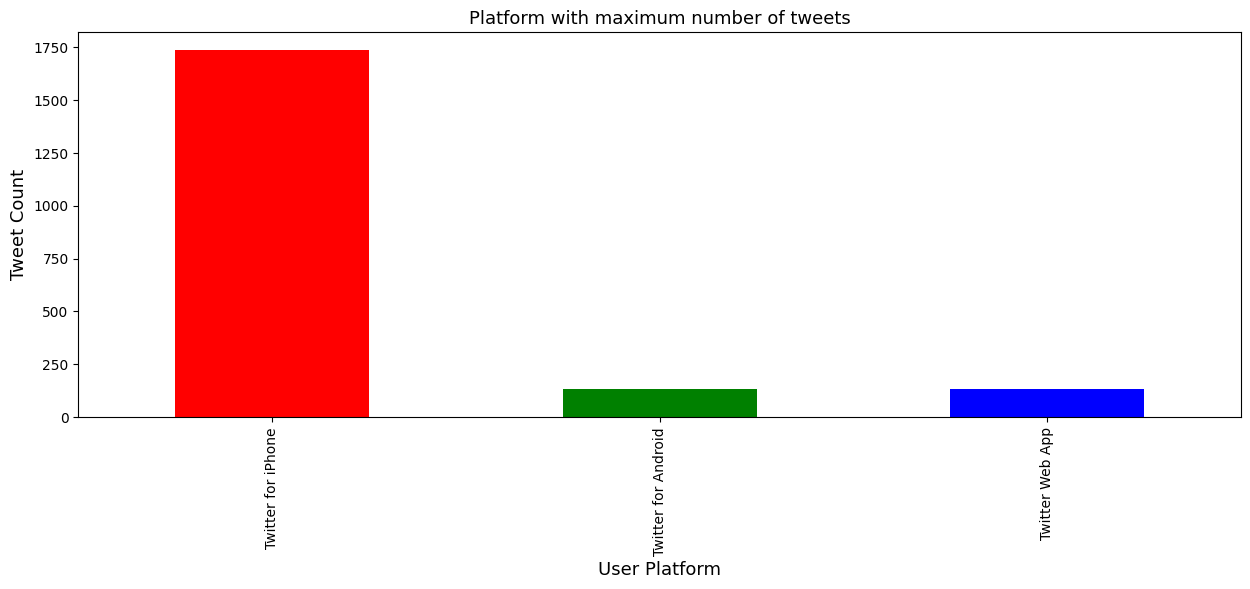

In [26]:
plt.figure(figsize=(15,5))
src = data['source'].value_counts().sort_values(ascending=False)
source = src.head(10)
source.plot.bar(color=['red', 'green', 'blue'])
plt.title('Platform with maximum number of tweets',size=13)
plt.xlabel('User Platform',size=13)
plt.ylabel('Tweet Count',size=13)
plt.show()

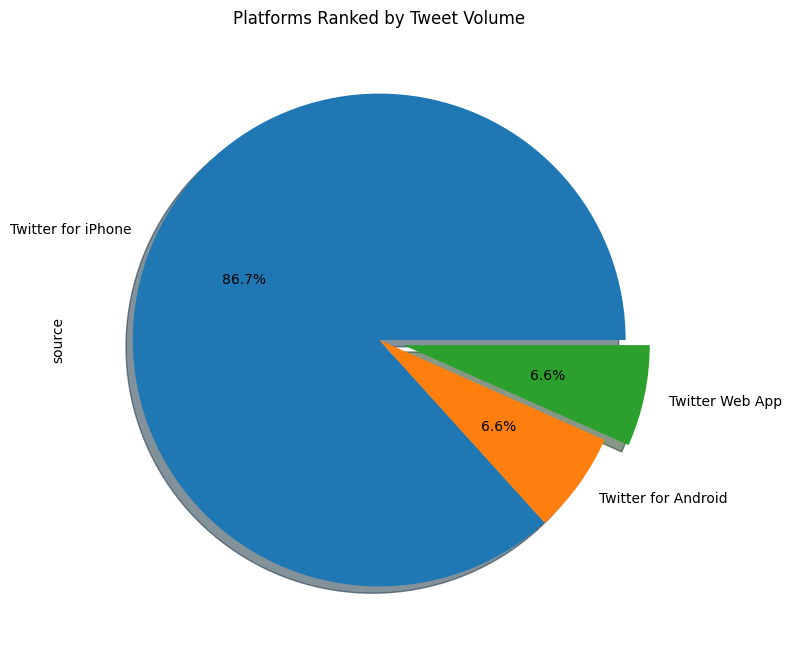

In [27]:
# Most Tweet Sources
pla = data['source'].value_counts().sort_values(ascending=False)
explode = (0, 0, 0.1) 
plt.figure(figsize=(8,8))
pla[0:5].plot(kind = 'pie', title = 'Platforms Ranked by Tweet Volume', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

### 4.SENTIMENT ANALYSIS WITH TEXTBLOB

In [28]:
data.head()

,user,date,text,user_location,favorite_count,number_followers,is_retweet,hashtags,source,num of words in text
0,DrLoupis,Thu Mar 23 21:36:05 +0000 2023,million french protest gather pari call remov ...,"København, Danmark",50407,285662,False,[],Twitter for iPhone,71
1,bennyjohnson,Fri Mar 24 01:13:52 +0000 2023,sum fear globalist technocrat happen right fra...,Tampa Florida,27384,1391419,False,[],Twitter for iPhone,74
2,BernieSpofforth,Thu Mar 23 23:01:30 +0000 2023,franc firefight follow polic begin stand choos...,"North West, England",24930,196109,False,[],Twitter for iPhone,67
3,BernieSpofforth,Fri Mar 24 12:19:29 +0000 2023,macron oop moment macron realis he’ wear expen...,"North West, England",12298,196109,False,[],Twitter for iPhone,84
4,DrLoupis,Fri Mar 24 13:28:18 +0000 2023,million peopl street pari want dictat emmanuel...,"København, Danmark",13340,285662,False,[],Twitter for iPhone,70


In [29]:
def SentimentChecker (newTweets):
    newDF = pd.DataFrame(columns=['text','subjectivity','polarity', 'sentiment'])
    for i in newTweets: 
        blob = TextBlob(i) #Create Textblob object of a tweet
        pol = blob.sentiment.polarity
        sub = blob.sentiment.subjectivity
        
        if pol > 0 : #If polarity of tweets is positive then sent = positive
            sent = "positive"
        elif pol < 0: #If polarity of tweet is negative then sent = negative
            sent = "negative"
        else: #If polarity equals 0 then sent = neutral
            sent = "neutral"
        
        #Create row for dataframe
        row = [i, sub, pol, sent] 
        #Add row to dataframe
        newDF.loc[len(newDF)] = row 
    return newDF

In [30]:
def JointPlotter(newDF):
    #Create jointplot for polarity and subjectivity of twitter tweets.
    sns.jointplot(data=newDF, x="subjectivity", y="polarity", hue="sentiment")
    plt.show()
    
    sentimentCounts = pd.DataFrame(newDF["sentiment"].value_counts())
    sentimentCounts = sentimentCounts.rename({'sentiment': 'count'}, axis=1)
    sentimentCounts["sentiment"] = sentimentCounts.index
    
    ax=sns.barplot(data= sentimentCounts, x="sentiment", y = "count") #Create barplot of sentiment counts
    # Add values on top of the bars
    for i, v in enumerate(newDF["sentiment"].value_counts()):
        ax.text(i, v+10, str(v), color='black', ha="center")
    plt.show()

    # Create pie chart of sentiment counts
    plt.pie(sentimentCounts["count"], labels=sentimentCounts["sentiment"], autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()



In [52]:
def visualiser(subset):
    #Create frequency distribution for "subset"
    fdist = nltk.FreqDist()
    for i in subset["text"]:
        i = nltk.word_tokenize(i)
        for j in i:
            fdist[j] +=1
    fdist.plot(30, cumulative=False)
    
    #Create word cloud for "subset"
    wordcloud = WordCloud(max_font_size=50, max_words = 100, background_color="black", width=500, height=500).generate_from_frequencies(fdist)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [32]:
cleanTweets=data['text']

In [33]:
# Dataframe sentiment of each tweet
SentimentChecker(cleanTweets).head(10)

,text,subjectivity,polarity,sentiment
0,million french protest gather pari call remov ...,0.000000,0.000000,neutral
1,sum fear globalist technocrat happen right fra...,0.267857,0.142857,positive
2,franc firefight follow polic begin stand choos...,0.000000,0.000000,neutral
3,macron oop moment macron realis he’ wear expen...,0.000000,0.000000,neutral
4,million peopl street pari want dictat emmanuel...,0.000000,0.000000,neutral
5,million protest call “macron dictator” remov m...,0.000000,0.000000,neutral
6,breathtak million french protest gather pari c...,0.000000,0.000000,neutral
7,franc today day whole franc strikesmillion peo...,0.400000,0.200000,positive
8,syria libya franc protest macron’ pension refo...,0.000000,0.000000,neutral
9,macron slowli sure turn franc violent dictator...,0.944444,-0.150000,negative


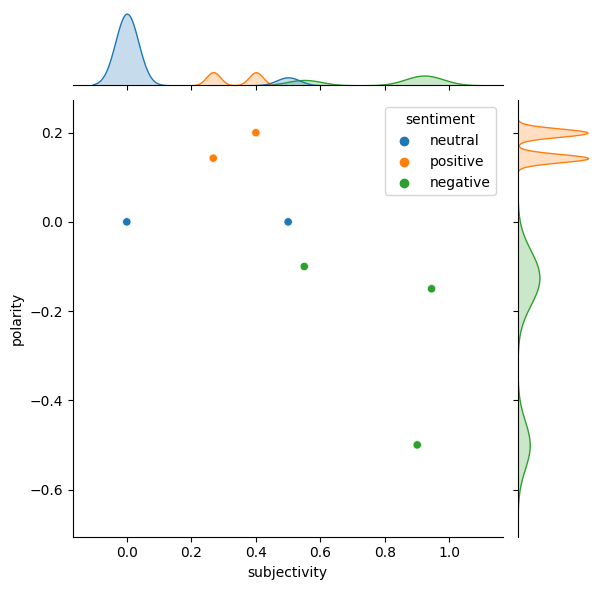

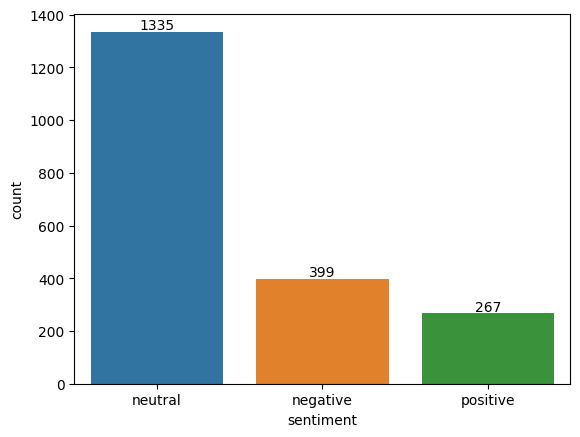

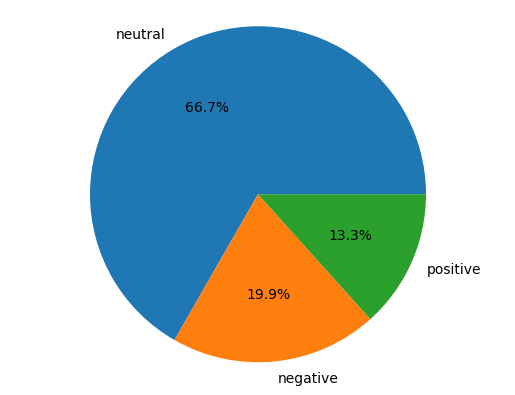

In [34]:
# bar, pie chart
SentimentDF = SentimentChecker(cleanTweets)
JointPlotter(SentimentDF)


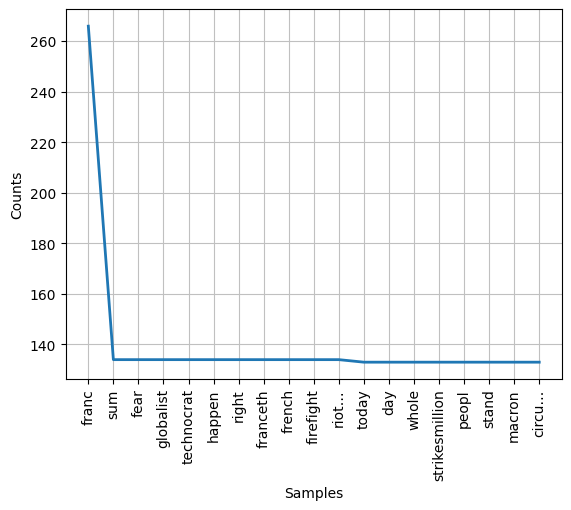

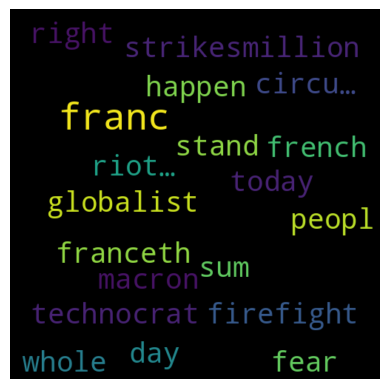

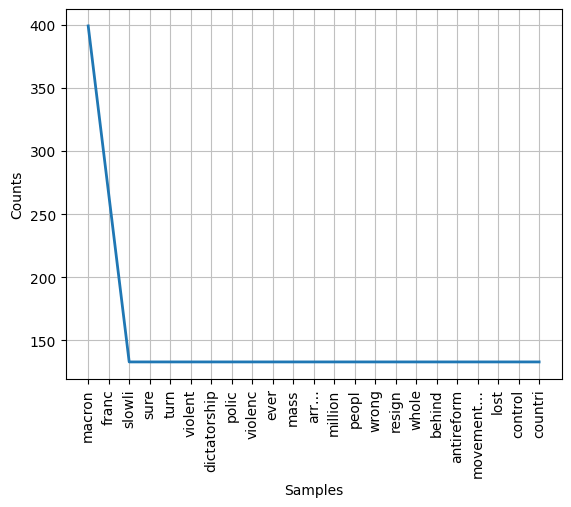

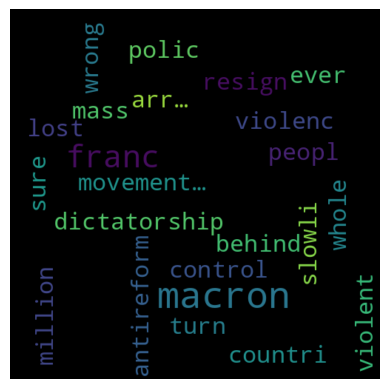

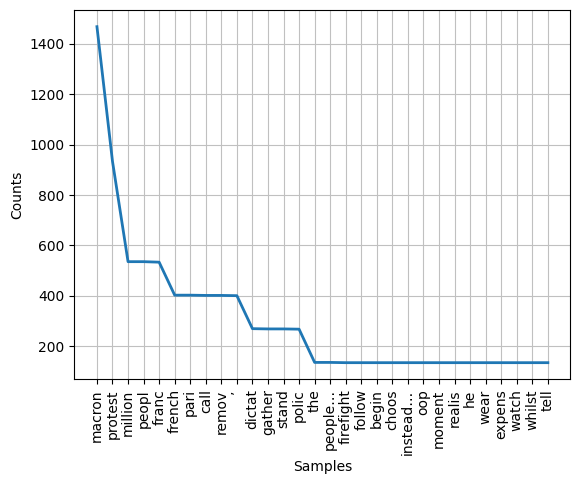

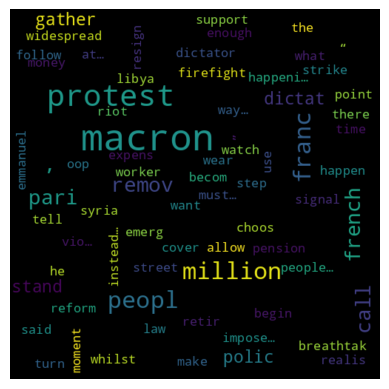

In [54]:
    
#Call visualiser function to plot a wordcloud and a frequency distribution
visualiser(SentimentDF[SentimentDF["sentiment"] == "positive"])
visualiser(SentimentDF[SentimentDF["sentiment"] == "negative"])
visualiser(SentimentDF[SentimentDF["sentiment"] == "neutral"])

### 5. TOPIC MODELLING FOR "NUTRAL OPINION"

**Gensim LSI & LDA**

In [36]:

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint

In [37]:
def getNeutralTexts(texts):
    neutralTexts = []
    for text in texts:
        blob = TextBlob(text)
        if blob.sentiment.polarity == 0:
            neutralTexts.append(text)
    return neutralTexts

In [38]:
# Creating a list of documents 
list_of_docs = getNeutralTexts(data['text'])

# Implementing the function for list_of_docs
doc_clean = [doc.split() for doc in list_of_docs]
print(doc_clean[:1])

[['million', 'french', 'protest', 'gather', 'pari', 'call', 'remov', 'macron', 'dictat', 'the', 'people…']]


In [39]:
# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LSi model
lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=6, id2word=dictionary)
pprint(lsimodel.print_topics())

[(0,
  '0.556*"macron" + 0.403*"protest" + 0.276*"million" + 0.230*"french" + '
  '0.224*"call" + 0.224*"remov" + 0.210*"pari" + 0.174*"peopl" + '
  '0.158*"gather" + 0.135*"dictat"'),
 (1,
  '-0.378*"peopl" + -0.268*"franc" + -0.244*"stand" + 0.235*"remov" + '
  '0.235*"call" + 0.223*"million" + 0.216*"protest" + -0.188*"macron" + '
  '0.158*"gather" + 0.145*"pari"'),
 (2,
  '-0.393*"protest" + -0.357*"franc" + 0.187*"french" + -0.186*"stand" + '
  '-0.185*"polic" + 0.139*"wear" + 0.139*"oop" + 0.139*"he’" + 0.139*"expens" '
  '+ 0.139*"whilst"'),
 (3,
  '0.400*"stand" + 0.224*"peopl" + 0.213*"million" + 0.200*"instead…" + '
  '0.200*"begin" + 0.200*"follow" + 0.200*"choos" + 0.200*"firefight" + '
  '0.196*"pari" + -0.181*"protest"'),
 (4,
  '-0.249*"polic" + -0.213*"protest" + -0.194*"stand" + 0.167*"franc" + '
  '0.159*"worker" + 0.159*"there" + 0.159*"strike" + 0.159*"cover" + '
  '0.159*"at…" + 0.159*"allow"'),
 (5,
  '0.275*"widespread" + 0.275*"becom" + 0.275*"vio…" + 0.275*"lib

In [40]:
import string
from gensim.models.ldamodel import LdaModel

# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LDA model
ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=6,id2word=dictionary, random_state=20, passes=30)

# printing the topics
pprint(ldamodel.print_topics())

[(0,
  '0.100*"franc" + 0.050*"what’" + 0.050*"enough" + 0.050*"happen" + '
  '0.050*"make" + 0.050*"step" + 0.050*"time" + 0.050*"way…" + 0.050*"syria" + '
  '0.050*"pension"'),
 (1,
  '0.093*"protest" + 0.093*"macron" + 0.070*"call" + 0.070*"remov" + '
  '0.070*"million" + 0.047*"gather" + 0.047*"french" + 0.047*"pari" + '
  '0.023*"the" + 0.023*"people…"'),
 (2,
  '0.142*"macron" + 0.071*"french" + 0.071*"peopl" + 0.071*"oop" + '
  '0.071*"expens" + 0.071*"he’" + 0.071*"moment" + 0.071*"must…" + '
  '0.071*"watch" + 0.071*"realis"'),
 (3,
  '0.099*"macron" + 0.099*"pari" + 0.099*"dictat" + 0.099*"million" + '
  '0.099*"peopl" + 0.099*"emmanuel" + 0.099*"happeni…" + 0.099*"resign" + '
  '0.099*"want" + 0.099*"street"'),
 (4,
  '0.220*"protest" + 0.110*"macron" + 0.110*"polic" + 0.110*"turn" + '
  '0.110*"support" + 0.110*"signal" + 0.110*"riot" + 0.110*"point" + '
  '0.000*"franc" + 0.000*"vio…"'),
 (5,
  '0.198*"stand" + 0.099*"franc" + 0.099*"peopl" + 0.099*"begin" + '
  '0.099*"fi

**Compare the coherence of the LSI and LDA models**

In [41]:
from gensim.models.coherencemodel import CoherenceModel
# Compute Coherence Scores
coherence_model_lsi = CoherenceModel(model=lsimodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lsi = coherence_model_lsi.get_coherence()

coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('LSI Coherence Score:', coherence_lsi)
print('LDA Coherence Score:', coherence_lda)

LSI Coherence Score: 0.2848280078116513
LDA Coherence Score: 0.28127232391308415


The LDA model has a higher coherence score than the LSI model, which suggests that the topics generated by the LDA model are more interpretable and coherent than those generated by the LSI model

In [42]:
# Compute Perplexity
perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
print('\nPerplexity: ', perplexity_lda)  


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -3.16264208288403

Coherence Score:  0.28127232391308415


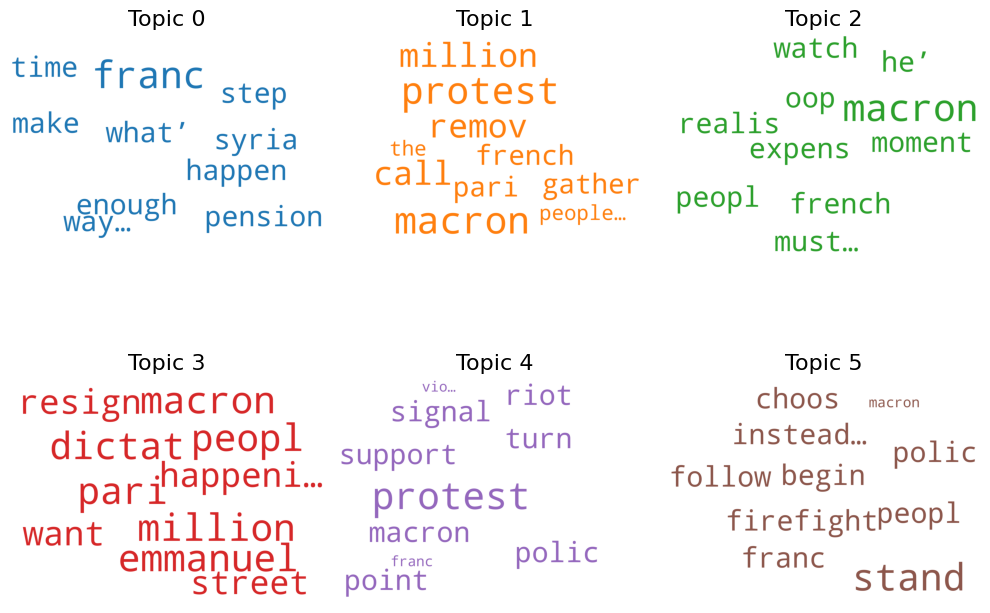

In [43]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(10,8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()